# ML model for captcha 

In [2]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [2]:
df=pd.read_csv("user_behavior_data.csv")
print(df.head(10))
print(df.tail(10))

   avg_speed  total_distance    jitter  click_frequency  scroll_speed  \
0   2.748357     1316.745694  0.093087                3      1.639521   
1   2.037959      456.277218  0.173282                3      1.387112   
2   3.889157      204.388600  0.159682                7      1.442176   
3   2.943874     1988.529572  0.024592                2      2.049823   
4   2.543524      377.396709  0.085050                6      1.095753   
5   1.768243      127.680392  0.122647                7      1.416970   
6   2.099086     1000.503748  0.169201                5      1.549826   
7   2.736796     2586.190397  0.082163                5      1.778061   
8   3.024674      253.949867  0.166255                8      0.815064   
9   2.988590     2635.523457  0.123662                6      1.463586   

   scroll_depth  scroll_pauses  typing_speed  dwell_time  flight_time  \
0    615.625031              0     50.105153    0.088382     0.273742   
1    467.666510              1     33.997461    0.

In [3]:
print(df.info())
print(df.isnull().sum())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_speed                10000 non-null  float64
 1   total_distance           10000 non-null  float64
 2   jitter                   10000 non-null  float64
 3   click_frequency          10000 non-null  int64  
 4   scroll_speed             10000 non-null  float64
 5   scroll_depth             10000 non-null  float64
 6   scroll_pauses            10000 non-null  int64  
 7   typing_speed             10000 non-null  float64
 8   dwell_time               10000 non-null  float64
 9   flight_time              10000 non-null  float64
 10  error_rate               10000 non-null  float64
 11  dwell_time_on_page       10000 non-null  float64
 12  idle_time                10000 non-null  float64
 13  time_between_actions     10000 non-null  float64
 14  session_duration       

In [4]:
'''Features in the Dataset:
avg_speed: Average speed of the mouse.
total_distance: Total distance the mouse has moved.
jitter: Variability in mouse movement (random small movements).
click_frequency: Frequency of mouse clicks.
scroll_speed: Speed of scrolling.
scroll_depth: How far the user scrolled.
scroll_pauses: Number of pauses while scrolling.
typing_speed: Words typed per minute.
dwell_time: Time spent pressing a key.
flight_time: Time between key presses.
error_rate: Percentage of typing errors.
dwell_time_on_page: Time spent on the page.
idle_time: Time spent inactive.
time_between_actions: Time between successive user actions.
session_duration: Duration of the session.	
tab_switching_frequency: How often the user switches between tabs.
label: The classification label (1 for human, 0 for bot).'''

'Features in the Dataset:\navg_speed: Average speed of the mouse.\ntotal_distance: Total distance the mouse has moved.\njitter: Variability in mouse movement (random small movements).\nclick_frequency: Frequency of mouse clicks.\nscroll_speed: Speed of scrolling.\nscroll_depth: How far the user scrolled.\nscroll_pauses: Number of pauses while scrolling.\ntyping_speed: Words typed per minute.\ndwell_time: Time spent pressing a key.\nflight_time: Time between key presses.\nerror_rate: Percentage of typing errors.\ndwell_time_on_page: Time spent on the page.\nidle_time: Time spent inactive.\ntime_between_actions: Time between successive user actions.\nsession_duration: Duration of the session.\t\ntab_switching_frequency: How often the user switches between tabs.\nlabel: The classification label (1 for human, 0 for bot).'

In [5]:
#descriptive statistics of the dataset
df.describe()

,avg_speed,total_distance,jitter,click_frequency,scroll_speed,scroll_depth,scroll_pauses,typing_speed,dwell_time,flight_time,error_rate,dwell_time_on_page,idle_time,time_between_actions,session_duration,tab_switching_frequency,label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2.506187,1000.705688,0.099237,5.048500,1.503655,492.223618,2.972800,40.047773,0.099676,0.299677,0.050247,300.138041,100.449600,9.903795,602.082092,2.006500,0.91550
std,0.503695,991.240584,0.049914,2.246297,0.504526,493.792406,1.723182,9.928141,0.019952,0.050543,0.019894,299.511201,99.592587,10.039426,598.711046,1.428517,0.27815
min,0.682665,0.078757,-0.084401,0.000000,-0.532302,0.078879,0.000000,-4.727808,0.025237,0.102770,-0.018527,0.004382,0.000657,0.001080,0.018432,0.000000,0.00000
25%,2.169991,292.877413,0.065718,3.000000,1.160133,139.441459,2.000000,33.406413,0.086121,0.264979,0.036849,84.944429,29.161086,2.727322,177.318245,1.000000,1.00000
50%,2.511033,701.814748,0.099295,5.000000,1.503090,343.556810,3.000000,40.026958,0.099333,0.299726,0.050094,211.684564,70.292843,6.767836,418.952413,2.000000,1.00000
75%,2.835085,1383.161510,0.133170,6.000000,1.844276,687.143060,4.000000,46.770176,0.113011,0.333663,0.063551,418.302740,139.431625,13.867006,822.190130,3.000000,1.00000
max,4.507789,8123.519508,0.292256,18.000000,3.394987,4747.858107,12.000000,76.569668,0.185966,0.512667,0.128322,3190.915244,771.014844,107.835148,5392.794159,11.000000,1.00000


In [6]:
#session_duration feature had been removed
df.drop(['session_duration'],axis='columns',inplace=True)
df.columns

Index(['avg_speed', 'total_distance', 'jitter', 'click_frequency',
       'scroll_speed', 'scroll_depth', 'scroll_pauses', 'typing_speed',
       'dwell_time', 'flight_time', 'error_rate', 'dwell_time_on_page',
       'idle_time', 'time_between_actions', 'tab_switching_frequency',
       'label'],
      dtype='object')

<Axes: >

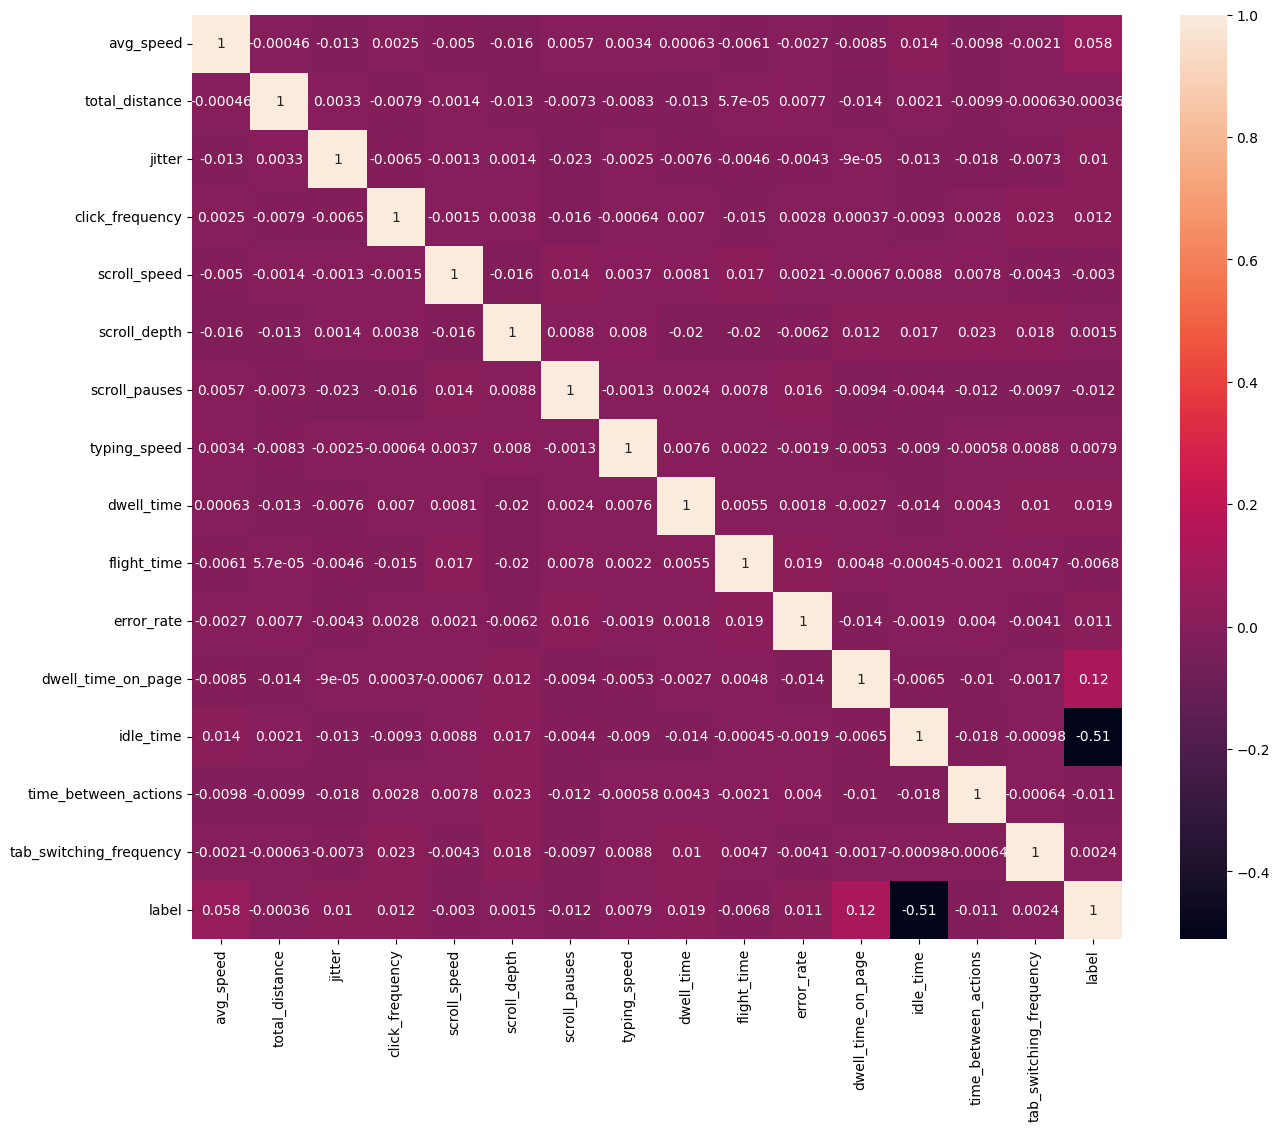

In [7]:
#correlation matrix between features of the dataset
cm=df.corr()
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(cm,annot=True,color='red')

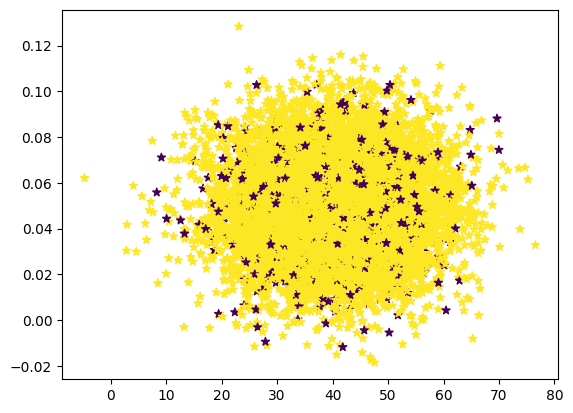

In [8]:
#a plot between typing_speed and error_rate to classify humans and bots
plt.scatter(df['typing_speed'],df['error_rate'],c=df['label'],marker="*")
plt.show()

In [9]:
#final dataset after removing unnecessary features
df.head(10)

,avg_speed,total_distance,jitter,click_frequency,scroll_speed,scroll_depth,scroll_pauses,typing_speed,dwell_time,flight_time,error_rate,dwell_time_on_page,idle_time,time_between_actions,tab_switching_frequency,label
0,2.748357,1316.745694,0.093087,3,1.639521,615.625031,0,50.105153,0.088382,0.273742,0.038572,223.178349,56.553707,3.442230,1,1
1,2.037959,456.277218,0.173282,3,1.387112,467.666510,1,33.997461,0.118949,0.314552,0.037289,174.027253,13.015223,6.835472,3,1
2,3.889157,204.388600,0.159682,7,1.442176,246.065146,3,36.988963,0.077389,0.306721,0.061642,391.698873,147.521453,0.769293,0,1
3,2.943874,1988.529572,0.024592,2,2.049823,653.937892,3,49.729635,0.115912,0.374772,0.056764,204.244419,73.967884,5.578142,0,1
4,2.543524,377.396709,0.085050,6,1.095753,1327.475043,6,34.982430,0.085959,0.283617,0.042158,511.148918,197.134497,0.069764,1,1
5,1.768243,127.680392,0.122647,7,1.416970,178.965230,1,40.602302,0.149265,0.290382,0.056031,46.959258,67.227211,42.440370,2,1
6,2.099086,1000.503748,0.169201,5,1.549826,565.925867,0,34.965243,0.068987,0.303428,0.028754,352.263758,48.895870,27.603438,1,1
7,2.736796,2586.190397,0.082163,5,1.778061,1137.561613,4,46.176408,0.124341,0.311314,0.066948,2.771882,10.699690,10.891624,1,0
8,3.024674,253.949867,0.166255,8,0.815064,139.850102,6,32.282193,0.071872,0.298274,0.030740,7.384944,103.696879,1.949336,3,0
9,2.988590,2635.523457,0.123662,6,1.463586,406.868496,3,40.582087,0.077141,0.317889,0.061216,358.222328,121.228756,4.454923,5,1


In [10]:
#splitting the dependent and independent variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
#feature importance using sklearn module
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

[0.0571356  0.0356886  0.0355324  0.03122579 0.03446309 0.03854368
 0.02999244 0.03517164 0.03620279 0.03491872 0.03565627 0.13056826
 0.40055667 0.03637452 0.02796952]


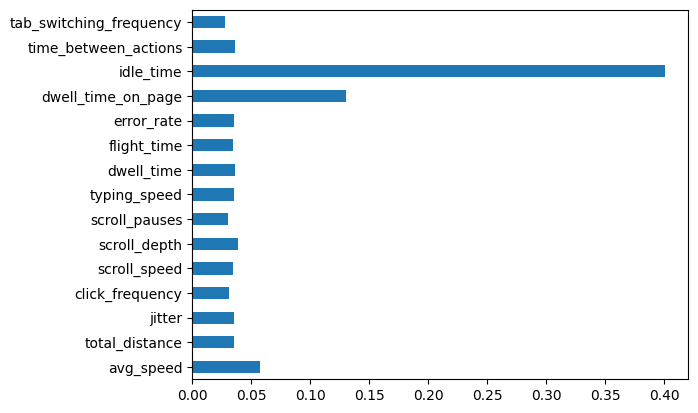

<Figure size 2000x2000 with 0 Axes>

In [12]:
#ploting the importance of the features
print(model.feature_importances_)
feature_imp=pd.Series(model.feature_importances_,index=x.columns)
feature_imp.plot(kind='barh')
plt.figure(figsize=(20,20))
plt.show()

In [21]:
#train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
#importing the random forest classifier and tuning hyperparameters 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
cl_model=RandomForestClassifier()

In [23]:

#Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],            # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],              # Depth of the trees
    'min_samples_split': [2, 5, 10],                      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                        # Minimum number of samples required at a leaf node
    'bootstrap': [True, False],                           # Whether bootstrap samples are used
    'max_features': ['auto', 'sqrt', 'log2'],             # Number of features to consider at each split
    'criterion': ['gini', 'entropy']                      # Criterion for splitting
}

#RandomizedSearchCV setup
random_search = RandomizedSearchCV(estimator=cl_model,
                                   param_distributions=param_dist,
                                   n_iter=100,         # Number of parameter settings that are sampled
                                   cv=3,               # 3-fold cross-validation
                                   verbose=2,          # Controls verbosity
                                   random_state=42,
                                   n_jobs=-1)          # Use all available cores


In [24]:
random_search.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [17]:
tuned_rm=random_search.best_estimator_
y_pred=tuned_rm.predict(x_test)

In [18]:
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [19]:
#accuracy of our ML model
from sklearn.metrics import accuracy_score,confusion_matrix
c_matrix=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(c_matrix)

0.9985
[[ 174    3]
 [   0 1823]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23536\1897921534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred)


<Axes: ylabel='Density'>

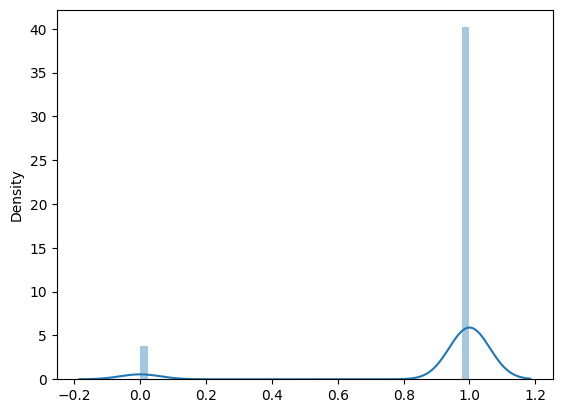

In [20]:
sns.distplot(y_pred)